# Capstone Project - The Battle of the Neighborhoods (Week 2)

Applied Data Science Capstone by IBM/Coursera

# Title - Data Analysis for Promotion of Vehicle Insurance in each borough of Munich city


# Business Problem
One of the vehicle insurance company wants to increase number of people having cars or motorbikes to use their company's vehicle insurances. They want to do so by providing cutomized offers and promotions to the people of Munich having cars. They have tie-up with automotive manufacturers, petroleum stations, car/motor-bike repair shops etc and also have contact with many common apps owners.

The vehicle insurance company can know when people are near the venues like automotive repair shops, gas/petroleum stations etc and wanted to send customized offers/promotions when people are near the venues where they have tie-up with.

Now they want to segregate the people having similar characteristics into clusters so that they can send customized offers/promotions to increase their insurances count thereby increasing their revenue.

In the notebook we will help the insurance company by analysing the number_of_venues they have tie-up with in each region, number of working professionals, number of new cars registered in each region of munich in a year to segment the whole munich region into different segments.

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import requests
import folium
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.cm as cm
from matplotlib import colors


In [ ]:
folder_path='/content/drive/My Drive/Accident/'

# Read Dataset

In [ ]:
df_borough=pd.read_csv(folder_path+'Borough-Population.csv')

# Data Processing

In [ ]:
df_borough.head()

,stadtbezirk,einwohner,flaeche,einwohnerdichte,anteil_an_gesamtbevoelkerung
0,1 Altstadt - Lehel,20422,314.57,65.0,1.39
1,2 Ludwigsvorstadt - Isarvorstadt,50620,440.14,115.0,3.46
2,3 Maxvorstadt,51642,429.79,120.0,3.53
3,4 Schwabing West,65892,436.30,151.0,4.50
4,5 Au - Haidhausen,59752,421.96,142.0,4.08


In [ ]:
columns=['borough','residents','surface','population density','share_total_population']

In [ ]:
df_borough.columns=columns

In [ ]:
df_borough.head(26)

,borough,residents,surface,population density,share_total_population
0,1 Altstadt - Lehel,20422,314.57,65.0,1.39
1,2 Ludwigsvorstadt - Isarvorstadt,50620,440.14,115.0,3.46
2,3 Maxvorstadt,51642,429.79,120.0,3.53
3,4 Schwabing West,65892,436.30,151.0,4.50
4,5 Au - Haidhausen,59752,421.96,142.0,4.08
5,6 Sendling,39953,393.87,101.0,2.73
6,7 Sendling - Westpark,55405,781.45,71.0,3.78
7,8 Schwanthalerhöhe,29663,207.02,143.0,2.02
8,9 Neuhausen - Nymphenburg,95906,1291.45,74.0,6.55
9,10 Moosach,51537,1109.36,46.0,3.52


# Remove last row as the data is not correct

In [ ]:
df_borough=df_borough[0:len(df_borough)-1].copy()

# Remove numbers from borough column at the beginning of each value

In [ ]:
df_borough['borough']=df_borough['borough'].apply(lambda x:x[3:]).copy()

# Remove leading whitespace from some of the strings in borough column

In [ ]:
df_borough['borough']=df_borough['borough'].apply(lambda x:x.lstrip()).copy()


In [ ]:
df_borough.sort_values(by='borough',inplace=True,ignore_index=True)

In [ ]:
df_borough.head(26)

,borough,residents,surface,population density,share_total_population
0,Allach - Untermenzing,30737,1545.17,20.0,2.10
1,Altstadt - Lehel,20422,314.57,65.0,1.39
2,Au - Haidhausen,59752,421.96,142.0,4.08
3,Aubing - Lochhausen - Langwied,42305,3406.02,12.0,2.89
4,Berg am Laim,43068,631.46,68.0,2.94
5,Bogenhausen,82138,2370.97,35.0,5.61
6,Feldmoching - Hasenbergl,59391,2893.78,21.0,4.05
7,Hadern,48945,922.37,53.0,3.34
8,Laim,54030,528.59,102.0,3.69
9,Ludwigsvorstadt - Isarvorstadt,50620,440.14,115.0,3.46


In [ ]:
def lat_long(place_value):
  'Function to get the latitude and longitude of a place'
  geolocator = Nominatim(user_agent="first-try")
  location = geolocator.geocode(place_value)
  if location==None:
    return None,None
  return location.latitude,location.longitude

In [ ]:
for i,value in enumerate(df_borough['borough']):
  df_borough.loc[i,'latitude'],df_borough.loc[i,'longitude']=lat_long(value)

In [ ]:
# df_borough.shape

In [ ]:
df_borough.head()

,borough,residents,surface,population density,share_total_population,latitude,longitude
0,Allach - Untermenzing,30737,1545.17,20.0,2.10,48.195157,11.462973
1,Altstadt - Lehel,20422,314.57,65.0,1.39,48.137828,11.574582
2,Au - Haidhausen,59752,421.96,142.0,4.08,48.128753,11.590536
3,Aubing - Lochhausen - Langwied,42305,3406.02,12.0,2.89,48.165059,11.400221
4,Berg am Laim,43068,631.46,68.0,2.94,48.123483,11.633451


# Lets collect the neighboorhood venues for each borough

Define Foursquare Credentials and Version

In [ ]:
CLIENT_ID = 'SC2A0D1I2XQQ4FGDSY1FKY4K4VEGAV3XACW2WCCPCG1DSY4G'  # your Foursquare ID 
CLIENT_SECRET ='2KGMC52DBRWU4RKXCYXDB0XLWLO30MVDIYY40IC45ECML3CZ'  # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SC2A0D1I2XQQ4FGDSY1FKY4K4VEGAV3XACW2WCCPCG1DSY4G
CLIENT_SECRET:2KGMC52DBRWU4RKXCYXDB0XLWLO30MVDIYY40IC45ECML3CZ


# Create a function to repeat the process of exploring the venues for all the neighborhoods in Munich

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    ''' Function to return nearby venues using foursquare-api
        Provided name of the place, its latitude and longitude values and radius with which we have to find nearby venues
    '''    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


Create a new dataframe called Munich_venues.

In [ ]:
LIMIT = 100
radius = 1000
Munich_venues = getNearbyVenues(names=df_borough['borough'],
                                   latitudes=df_borough['latitude'],
                                   longitudes=df_borough['longitude'],
                                   radius = radius
                                  )

Allach - Untermenzing
Altstadt - Lehel
Au - Haidhausen
Aubing - Lochhausen - Langwied
Berg am Laim
Bogenhausen
Feldmoching - Hasenbergl
Hadern
Laim
Ludwigsvorstadt - Isarvorstadt
Maxvorstadt
Milbertshofen - Am Hart
Moosach
Neuhausen - Nymphenburg
Obergiesing - Fasangarten
Pasing - Obermenzing
Ramersdorf - Perlach
Schwabing - Freimann
Schwabing - West
Schwanthalerhöhe
Sendling
Sendling - Westpark
Thalkirchen - Obersendling - Forstenried - Fürstenried - Solln
Trudering - Riem
Untergiesing - Harlaching


In [ ]:
print(Munich_venues.shape)
Munich_venues.head()

(1454, 7)


,borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Allach - Untermenzing,48.195157,11.462973,Bäckerei Schuhmair,48.197175,11.459016,Bakery
1,Allach - Untermenzing,48.195157,11.462973,Sport Bittl,48.191447,11.466553,Sporting Goods Shop
2,Allach - Untermenzing,48.195157,11.462973,Trattoria Olive,48.189905,11.466970,Trattoria/Osteria
3,Allach - Untermenzing,48.195157,11.462973,Zur Allacher Mühle,48.198411,11.457869,Bavarian Restaurant
4,Allach - Untermenzing,48.195157,11.462973,Würmtalhof,48.188834,11.460680,German Restaurant


# Let's check the venues by borough

In [ ]:
Munich_venues.groupby('borough').count()

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
borough,,,,,,
Allach - Untermenzing,21,21,21,21,21,21
Altstadt - Lehel,100,100,100,100,100,100
Au - Haidhausen,100,100,100,100,100,100
Aubing - Lochhausen - Langwied,4,4,4,4,4,4
Berg am Laim,34,34,34,34,34,34
Bogenhausen,27,27,27,27,27,27
Feldmoching - Hasenbergl,8,8,8,8,8,8
Hadern,38,38,38,38,38,38
Laim,25,25,25,25,25,25


In [ ]:
Munich_venues.columns

Index(['borough', 'Borough Latitude', 'Borough Longitude', 'Venue',
       'Venue Latitude', 'Venue Longitude', 'Venue Category'],
      dtype='object')

In [ ]:
Munich_venues['Venue Category'].unique()

array(['Bakery', 'Sporting Goods Shop', 'Trattoria/Osteria',
       'Bavarian Restaurant', 'German Restaurant', 'Hotel', 'Drugstore',
       'Italian Restaurant', 'Supermarket', 'Tennis Court',
       'Vietnamese Restaurant', 'Park', 'Shopping Mall', 'Plaza',
       'Gourmet Shop', 'Fountain', 'Church', "Men's Store",
       'Department Store', 'Burrito Place', 'Farmers Market', 'Irish Pub',
       'Bookstore', 'Café', 'Coffee Shop', 'Candy Store', 'Beer Garden',
       'Boutique', 'Clothing Store', 'Art Museum', 'Organic Grocery',
       'Opera House', 'Electronics Store', 'Snack Place',
       'Falafel Restaurant', 'Fish Market', 'Restaurant',
       'Ice Cream Shop', 'Seafood Restaurant', 'Sandwich Place',
       'Pizza Place', 'Furniture / Home Store', 'Cocktail Bar', 'Bar',
       'Middle Eastern Restaurant', 'Cosmetics Shop',
       'Vegetarian / Vegan Restaurant', 'Afghan Restaurant',
       'Convenience Store', 'Cupcake Shop', 'Steakhouse', 'Historic Site',
       'Food Court',

# Let's just select the below columns from the venues
'Motorcycle Shop'
 'Automotive Shop'
 'Rental Car Location'
 'Auto Dealership'
 'Gas Station'
 'Parking'
 'Hotel'
 'Motel'

In [ ]:
Munich_venues[(Munich_venues['Venue Category'].str.contains('Motorcycle Shop', regex=False)) |
              (Munich_venues['Venue Category'].str.contains('Automotive Shop', regex=False)) |
              (Munich_venues['Venue Category'].str.contains('Rental Car Location', regex=False)) |
              (Munich_venues['Venue Category'].str.contains('Auto Dealership', regex=False)) |
              (Munich_venues['Venue Category'].str.contains('Gas Station', regex=False)) |
              (Munich_venues['Venue Category'].str.contains('Parking', regex=False)) |
              (Munich_venues['Venue Category'].str.contains('Shopping Mall', regex=False)) |
              (Munich_venues['Venue Category'].str.contains('Hotel', regex=False)) |
              (Munich_venues['Venue Category'].str.contains('Motel',regex=False))
               ].count()

borough              79
Borough Latitude     79
Borough Longitude    79
Venue                79
Venue Latitude       79
Venue Longitude      79
Venue Category       79
dtype: int64

# Places which can be used to advertise insurance claim

# Let's just select the below columns from the venues
'Motorcycle Shop'
 'Automotive Shop'
 'Rental Car Location'
 'Auto Dealership'
 'Gas Station'
 'Parking'
 'Hotel'
 'Motel'

In [ ]:
valuable_cols_advertisement=['Motorcycle Shop','Automotive Shop','Rental Car Location','Auto Dealership','Gas Station','Parking','Hotel','Motel']

In [ ]:
for val in valuable_cols_advertisement:
  Munich_venues[val]=Munich_venues['Venue Category'].apply(lambda x: 1.0 if x==val else 0.0)
  print(Munich_venues[val].value_counts())

0.0    1453
1.0       1
Name: Motorcycle Shop, dtype: int64
0.0    1451
1.0       3
Name: Automotive Shop, dtype: int64
0.0    1449
1.0       5
Name: Rental Car Location, dtype: int64
0.0    1453
1.0       1
Name: Auto Dealership, dtype: int64
0.0    1452
1.0       2
Name: Gas Station, dtype: int64
0.0    1453
1.0       1
Name: Parking, dtype: int64
0.0    1395
1.0      59
Name: Hotel, dtype: int64
0.0    1453
1.0       1
Name: Motel, dtype: int64


In [ ]:
Munich_places=Munich_venues[(Munich_venues['Venue Category'].str.contains('Motorcycle Shop', regex=False)) |
              (Munich_venues['Venue Category'].str.contains('Automotive Shop', regex=False)) |
              (Munich_venues['Venue Category'].str.contains('Rental Car Location', regex=False)) |
              (Munich_venues['Venue Category'].str.contains('Auto Dealership', regex=False)) |
              (Munich_venues['Venue Category'].str.contains('Gas Station', regex=False)) |
              (Munich_venues['Venue Category'].str.contains('Parking', regex=False)) |
              (Munich_venues['Venue Category'].str.contains('Shopping Mall', regex=False)) |
              (Munich_venues['Venue Category'].str.contains('Hotel', regex=False)) |
              (Munich_venues['Venue Category'].str.contains('Motel',regex=False))
               ].groupby(['borough']).count()


In [ ]:
Munich_places.head(25)

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
borough,,,,,,
Allach - Untermenzing,3,3,3,3,3,3
Altstadt - Lehel,5,5,5,5,5,5
Au - Haidhausen,2,2,2,2,2,2
Aubing - Lochhausen - Langwied,1,1,1,1,1,1
Berg am Laim,3,3,3,3,3,3
Bogenhausen,2,2,2,2,2,2
Hadern,1,1,1,1,1,1
Laim,2,2,2,2,2,2
Ludwigsvorstadt - Isarvorstadt,1,1,1,1,1,1


In [ ]:
Munich_venues['Venue Category']

0                    Bakery
1       Sporting Goods Shop
2         Trattoria/Osteria
3       Bavarian Restaurant
4         German Restaurant
               ...         
1449       Department Store
1450               Bus Stop
1451                 Bakery
1452              Rest Area
1453    Rental Car Location
Name: Venue Category, Length: 1454, dtype: object

In [ ]:
Munich_places.head(25)

,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
borough,,,,,,
Allach - Untermenzing,3,3,3,3,3,3
Altstadt - Lehel,5,5,5,5,5,5
Au - Haidhausen,2,2,2,2,2,2
Aubing - Lochhausen - Langwied,1,1,1,1,1,1
Berg am Laim,3,3,3,3,3,3
Bogenhausen,2,2,2,2,2,2
Hadern,1,1,1,1,1,1
Laim,2,2,2,2,2,2
Ludwigsvorstadt - Isarvorstadt,1,1,1,1,1,1


In [ ]:
Munich_places.drop(['Borough Latitude', 'Borough Longitude', 'Venue Longitude', 'Venue', 'Venue Latitude'], axis = 1, inplace = True)
Munich_places.rename(columns = {'Venue Category':'Number of places'}, inplace=True)


In [ ]:
Munich_places.reset_index(inplace=True)

# Next Dataset contains the percentage of old-not-working-people (above 65 years) and totoal people combining working professional (18-65) years population  and old-not-working-people in each borough. I couldn't get the net-income data for each borough, so we can use the working professional information for our data analysis later

In [ ]:
df_borough.to_csv(folder_path+'borough-population-final.csv',index=False)

In [ ]:
df_working_professional=pd.read_csv(folder_path+'Old-Age-people-data.csv')

In [ ]:
df_working_professional.head()

,Indikator,Ausprägung,Jahr,Räumliche Gliederung,Indikatorwert,Basiswert 1,Basiswert 2,Basiswert 3,Basiswert 4,Basiswert 5,Name Basiswert 1,Name Basiswert 2,Name Basiswert 3,Name Basiswert 4,Name Basiswert 5
0,Altenquotient,Ausländer_innen,2017,Stadt München,12.9,44352,343545,NaN,NaN,NaN,Einwohner 65 Jahre und älter (Ausländer),Einwohner im Alter von 15 bis unter 65 (Auslän...,NaN,NaN,NaN
1,Altenquotient,Ausländer_innen,2017,01 Altstadt - Lehel,14.3,646,4502,NaN,NaN,NaN,Einwohner 65 Jahre und älter (Ausländer),Einwohner im Alter von 15 bis unter 65 (Auslän...,NaN,NaN,NaN
2,Altenquotient,Ausländer_innen,2017,02 Ludwigsvorstadt - Isarvorstadt,12.9,1593,12363,NaN,NaN,NaN,Einwohner 65 Jahre und älter (Ausländer),Einwohner im Alter von 15 bis unter 65 (Auslän...,NaN,NaN,NaN
3,Altenquotient,Ausländer_innen,2017,03 Maxvorstadt,10.5,1178,11243,NaN,NaN,NaN,Einwohner 65 Jahre und älter (Ausländer),Einwohner im Alter von 15 bis unter 65 (Auslän...,NaN,NaN,NaN
4,Altenquotient,Ausländer_innen,2017,04 Schwabing - West,13.3,1689,12703,NaN,NaN,NaN,Einwohner 65 Jahre und älter (Ausländer),Einwohner im Alter von 15 bis unter 65 (Auslän...,NaN,NaN,NaN


# Here the important columns are

Jahr - year

Ausprägung - Citizenship (Foreigner or Germans)

Räumliche Gliederung - Borough

Indikatorwert - old-not-working-professionals-percentage in each borough

Basiswert 1  - Total number of not old-working-professionals in each borough

Basiswert 2  - Total number of working professionals(18-65 years) in each borough



In [ ]:
important_cols=['Jahr','Ausprägung','Räumliche Gliederung','Indikatorwert','Basiswert 1','Basiswert 2']

In [ ]:
df_working_professional=df_working_professional[important_cols].copy()

In [ ]:
df_working_professional.head()

,Jahr,Ausprägung,Räumliche Gliederung,Indikatorwert,Basiswert 1,Basiswert 2
0,2017,Ausländer_innen,Stadt München,12.9,44352,343545
1,2017,Ausländer_innen,01 Altstadt - Lehel,14.3,646,4502
2,2017,Ausländer_innen,02 Ludwigsvorstadt - Isarvorstadt,12.9,1593,12363
3,2017,Ausländer_innen,03 Maxvorstadt,10.5,1178,11243
4,2017,Ausländer_innen,04 Schwabing - West,13.3,1689,12703


In [ ]:
cols_name =['year','citizenship','borough','old-not-working-percentage','no_old_not_working_professionals','total_residents(above 18years)']

In [ ]:
df_working_professional.columns=cols_name

In [ ]:
df_working_professional.head()

,year,citizenship,borough,old-not-working-percentage,no_old_not_working_professionals,total_residents(above 18years)
0,2017,Ausländer_innen,Stadt München,12.9,44352,343545
1,2017,Ausländer_innen,01 Altstadt - Lehel,14.3,646,4502
2,2017,Ausländer_innen,02 Ludwigsvorstadt - Isarvorstadt,12.9,1593,12363
3,2017,Ausländer_innen,03 Maxvorstadt,10.5,1178,11243
4,2017,Ausländer_innen,04 Schwabing - West,13.3,1689,12703


In [ ]:
df_working_professional['citizenship'].value_counts()

Ausländer_innen    468
Deutsche           468
gesamt             468
Name: citizenship, dtype: int64

In [ ]:
df_working_professional['citizenship']=df_working_professional['citizenship'].apply(lambda x:  'German' if x=='Deutsche' else 'Total' if x=='gesamt' else 'Foreigners')

# Removing 1st row as it contains total Munich data

# Take only 2017 year data (Recent data)

# Remove the numbers from borough

# Taking only total category from citizenship as other two catgory(German, Foreigners) comes under this

In [ ]:
df_working_professional=df_working_professional.iloc[1:,:]

In [ ]:
df_working_professional=df_working_professional.loc[df_working_professional['year']==2017].copy()

In [ ]:
df_working_professional['borough']=df_working_professional['borough'].apply(lambda x:x[3:])
df_working_professional['borough']=df_working_professional['borough'].apply(lambda x:x.lstrip())

In [ ]:
df_working_professional=df_working_professional.loc[df_working_professional['citizenship']=='Total'].copy()

In [ ]:
df_working_professional.reset_index(inplace=True,drop=True)

In [ ]:
df_working_professional.head()

,year,citizenship,borough,old-not-working-percentage,no_old_not_working_professionals,total_residents(above 18years)
0,2017,Total,dt München,24.9,265133,1063806
1,2017,Total,Altstadt - Lehel,22.5,3450,15337
2,2017,Total,Ludwigsvorstadt - Isarvorstadt,14.3,5790,40440
3,2017,Total,Maxvorstadt,15.1,6137,40749
4,2017,Total,Schwabing - West,23.3,11439,49129


In [ ]:
df_working_professional=df_working_professional.iloc[1:,:].copy()

In [ ]:
df_working_professional.head()

,year,citizenship,borough,old-not-working-percentage,no_old_not_working_professionals,total_residents(above 18years)
1,2017,Total,Altstadt - Lehel,22.5,3450,15337
2,2017,Total,Ludwigsvorstadt - Isarvorstadt,14.3,5790,40440
3,2017,Total,Maxvorstadt,15.1,6137,40749
4,2017,Total,Schwabing - West,23.3,11439,49129
5,2017,Total,Au - Haidhausen,19.0,8514,44828


In [ ]:
df_working_professional.drop(['year','citizenship'],axis=1,inplace=True)

In [ ]:
df_working_professional.sort_values(by='borough',inplace=True,ignore_index=True)

In [ ]:
df_working_professional.to_csv(folder_path+'working_professional.csv',index=False)

In [ ]:
for x,y in zip(df_working_professional['borough'],df_borough['borough']):
  print("Borough names in 1st and 2nd dataframes are {}   {}".format(x,y))
  print("Length of borough in 1st and 2nd dataframes are {}   {}".format(len(x),len(y)))

Borough names in 1st and 2nd dataframes are Allach - Untermenzing   Allach - Untermenzing
Length of borough in 1st and 2nd dataframes are 21   21
Borough names in 1st and 2nd dataframes are Altstadt - Lehel   Altstadt - Lehel
Length of borough in 1st and 2nd dataframes are 16   16
Borough names in 1st and 2nd dataframes are Au - Haidhausen   Au - Haidhausen
Length of borough in 1st and 2nd dataframes are 15   15
Borough names in 1st and 2nd dataframes are Aubing - Lochhausen - Langwied   Aubing - Lochhausen - Langwied
Length of borough in 1st and 2nd dataframes are 30   30
Borough names in 1st and 2nd dataframes are Berg am Laim   Berg am Laim 
Length of borough in 1st and 2nd dataframes are 12   13
Borough names in 1st and 2nd dataframes are Bogenhausen   Bogenhausen
Length of borough in 1st and 2nd dataframes are 11   11
Borough names in 1st and 2nd dataframes are Feldmoching - Hasenbergl   Feldmoching - Hasenbergl 
Length of borough in 1st and 2nd dataframes are 24   25
Borough name

# Now both the data frames are sorted and have same names but number of characters are not same in both the dataframes, inorder to rectify it, we can copy the names in borough column in one dataframe to other

In [ ]:
df_borough['borough']=df_working_professional['borough']

In [ ]:
final_df=df_borough.join(df_working_professional.set_index('borough'), on='borough')

In [ ]:
final_df.head()

,borough,residents,surface,population density,share_total_population,latitude,longitude,old-not-working-percentage,no_old_not_working_professionals,total_residents(above 18years)
0,Allach - Untermenzing,30737,1545.17,20.0,2.10,48.195157,11.462973,28.4,6167,21710
1,Altstadt - Lehel,20422,314.57,65.0,1.39,48.137828,11.574582,22.5,3450,15337
2,Au - Haidhausen,59752,421.96,142.0,4.08,48.128753,11.590536,19.0,8514,44828
3,Aubing - Lochhausen - Langwied,42305,3406.02,12.0,2.89,48.165059,11.400221,29.9,9068,30312
4,Berg am Laim,43068,631.46,68.0,2.94,48.123483,11.633451,25.0,7865,31500


# Derive Total working professionals from total_residents(Working_professionals+old_not_working_people) -old_not_working_people

In [ ]:
final_df['total_work_professionals']=final_df['total_residents(above 18years)']-final_df['no_old_not_working_professionals']

In [ ]:
final_df['total_work_professionals_percent']=(final_df['total_work_professionals']/final_df['residents'])*100

In [ ]:
final_df['total_work_professionals_percent']=final_df['total_work_professionals_percent'].apply(lambda x:np.round(x,2))

In [ ]:
final_df.head()

,borough,residents,surface,population density,share_total_population,latitude,longitude,old-not-working-percentage,no_old_not_working_professionals,total_residents(above 18years),total_work_professionals,total_work_professionals_percent
0,Allach - Untermenzing,30737,1545.17,20.0,2.10,48.195157,11.462973,28.4,6167,21710,15543,50.57
1,Altstadt - Lehel,20422,314.57,65.0,1.39,48.137828,11.574582,22.5,3450,15337,11887,58.21
2,Au - Haidhausen,59752,421.96,142.0,4.08,48.128753,11.590536,19.0,8514,44828,36314,60.77
3,Aubing - Lochhausen - Langwied,42305,3406.02,12.0,2.89,48.165059,11.400221,29.9,9068,30312,21244,50.22
4,Berg am Laim,43068,631.46,68.0,2.94,48.123483,11.633451,25.0,7865,31500,23635,54.88


# Next dataframe is the number of automotive devices newly registered in each borough

Here we are going to consider only privat registered members

In [ ]:
final_df.to_csv(folder_path+'final_df.csv',index=False)

In [ ]:
car_data_df=pd.read_csv(folder_path+'car-registration.csv')

In [ ]:
car_data_df.head()

,Indikator,Ausprägung,Jahr,Räumliche Gliederung,Indikatorwert,Basiswert 1,Basiswert 2,Name Basiswert 1,Name Basiswert 2
0,Pkw- Neuzulassungsanteil,gesamt,2017,Stadt München,26.9,191189,711969.3,Neuzulassungen von Personenkraftwagen (Jan-Dez),zugelassene Personenkraftwagen
1,Pkw- Neuzulassungsanteil,gesamt,2017,01 Altstadt - Lehel,147.2,94798,64380.0,Neuzulassungen von Personenkraftwagen (Jan-Dez),zugelassene Personenkraftwagen
2,Pkw- Neuzulassungsanteil,gesamt,2017,02 Ludwigsvorstadt - Isarvorstadt,8.2,1449,17732.4,Neuzulassungen von Personenkraftwagen (Jan-Dez),zugelassene Personenkraftwagen
3,Pkw- Neuzulassungsanteil,gesamt,2017,03 Maxvorstadt,24.5,6400,26119.5,Neuzulassungen von Personenkraftwagen (Jan-Dez),zugelassene Personenkraftwagen
4,Pkw- Neuzulassungsanteil,gesamt,2017,04 Schwabing - West,4.6,1011,22181.7,Neuzulassungen von Personenkraftwagen (Jan-Dez),zugelassene Personenkraftwagen


In [ ]:
car_data_df.columns

Index(['Indikator', 'Ausprägung', 'Jahr', 'Räumliche Gliederung',
       'Indikatorwert', 'Basiswert 1', 'Basiswert 2', 'Name Basiswert 1',
       'Name Basiswert 2'],
      dtype='object')

# Columns to be dropped

In [ ]:
# 'Indikator', 'Name Basiswert 1','Name Basiswert 2'

In [ ]:
car_data_df.drop(['Indikator', 'Name Basiswert 1','Name Basiswert 2'],axis=1,inplace=True)

In [ ]:
car_cols=['car_category','year','borough','percentage_car_registered','no_cars_registered','total_cars_registered']

In [ ]:
car_data_df.columns=car_cols


In [ ]:
car_data_df['car_category'].value_counts()

privat    312
gesamt    312
Name: car_category, dtype: int64

# We will take only the private car registered in each borough as we need only the private car registered for segmenting the data into clusters for sending different insurance advertisements to each category

# we select the data for only year 2017 and segregate the private registered data in each borough

In [ ]:
car_data_df=car_data_df.loc[(car_data_df['car_category']=='privat') & (car_data_df['year']==2017)].copy()

In [ ]:
car_data_df.reset_index(drop=True,inplace=True)

In [ ]:
car_data_df.head()

,car_category,year,borough,percentage_car_registered,no_cars_registered,total_cars_registered
0,privat,2017,Stadt München,4.1,21037,518598.6
1,privat,2017,01 Altstadt - Lehel,6.1,454,7382.8
2,privat,2017,02 Ludwigsvorstadt - Isarvorstadt,4.2,556,13288.2
3,privat,2017,03 Maxvorstadt,4.6,654,14123.6
4,privat,2017,04 Schwabing - West,3.5,718,20413.3


# Remove 1st column and do data processing in borough column so that we can merge these data with the final_df dataframe created before

In [ ]:
car_data_df=car_data_df.iloc[1:,:].copy().reset_index(drop=True)

In [ ]:
car_data_df.head()

,car_category,year,borough,percentage_car_registered,no_cars_registered,total_cars_registered
0,privat,2017,01 Altstadt - Lehel,6.1,454,7382.8
1,privat,2017,02 Ludwigsvorstadt - Isarvorstadt,4.2,556,13288.2
2,privat,2017,03 Maxvorstadt,4.6,654,14123.6
3,privat,2017,04 Schwabing - West,3.5,718,20413.3
4,privat,2017,05 Au - Haidhausen,4.2,710,16793.1


In [ ]:
car_data_df['borough']=car_data_df['borough'].apply(lambda x:x[3:])
car_data_df['borough']=car_data_df['borough'].apply(lambda x:x.lstrip())

In [ ]:
car_data_df.sort_values(by='borough',inplace=True,ignore_index=True)

In [ ]:
car_data_df.head(25)

,car_category,year,borough,percentage_car_registered,no_cars_registered,total_cars_registered
0,privat,2017,Allach - Untermenzing,3.9,565,14672.4
1,privat,2017,Altstadt - Lehel,6.1,454,7382.8
2,privat,2017,Au - Haidhausen,4.2,710,16793.1
3,privat,2017,Aubing - Lochhausen - Langwied,3.4,604,17819.1
4,privat,2017,Berg am Laim,3.7,544,14881.8
5,privat,2017,Bogenhausen,4.4,1539,35320.7
6,privat,2017,Feldmoching - Hasenbergl,3.5,777,22302.2
7,privat,2017,Hadern,3.5,647,18413.3
8,privat,2017,Laim,3.3,592,18123.4
9,privat,2017,Ludwigsvorstadt - Isarvorstadt,4.2,556,13288.2


In [ ]:
car_data_df['borough']=df_borough['borough'].copy()

In [ ]:
final_df.reset_index(drop=True,inplace=True)

In [ ]:
final_df.columns

Index(['borough', 'residents', 'surface', 'population density',
       'share_total_population', 'latitude', 'longitude',
       'old-not-working-percentage', 'no_old_not_working_professionals',
       'total_residents(above 18years)', 'total_work_professionals',
       'total_work_professionals_percent'],
      dtype='object')

In [ ]:
final_df=final_df.join(car_data_df.set_index('borough'), on='borough').copy()

In [ ]:
final_df.head()

,borough,residents,surface,population density,share_total_population,latitude,longitude,old-not-working-percentage,no_old_not_working_professionals,total_residents(above 18years),total_work_professionals,total_work_professionals_percent,car_category,year,percentage_car_registered,no_cars_registered,total_cars_registered
0,Allach - Untermenzing,30737,1545.17,20.0,2.10,48.195157,11.462973,28.4,6167,21710,15543,50.57,privat,2017,3.9,565,14672.4
1,Altstadt - Lehel,20422,314.57,65.0,1.39,48.137828,11.574582,22.5,3450,15337,11887,58.21,privat,2017,6.1,454,7382.8
2,Au - Haidhausen,59752,421.96,142.0,4.08,48.128753,11.590536,19.0,8514,44828,36314,60.77,privat,2017,4.2,710,16793.1
3,Aubing - Lochhausen - Langwied,42305,3406.02,12.0,2.89,48.165059,11.400221,29.9,9068,30312,21244,50.22,privat,2017,3.4,604,17819.1
4,Berg am Laim,43068,631.46,68.0,2.94,48.123483,11.633451,25.0,7865,31500,23635,54.88,privat,2017,3.7,544,14881.8


In [ ]:
final_df.to_csv(folder_path+'final_df.csv',index=False)

In [ ]:
Munich_places.shape

(23, 2)

In [ ]:
final_df['borough'].values

array(['Allach - Untermenzing', 'Altstadt - Lehel', 'Au - Haidhausen',
       'Aubing - Lochhausen - Langwied', 'Berg am Laim', 'Bogenhausen',
       'Feldmoching - Hasenbergl', 'Hadern', 'Laim',
       'Ludwigsvorstadt - Isarvorstadt', 'Maxvorstadt',
       'Milbertshofen - Am Hart', 'Moosach', 'Neuhausen - Nymphenburg',
       'Obergiesing - Fasangarten', 'Pasing - Obermenzing',
       'Ramersdorf - Perlach', 'Schwabing - Freimann', 'Schwabing - West',
       'Schwanthalerhöhe', 'Sendling', 'Sendling - Westpark',
       'Thalkirchen - Obersendling - Forstenried - Fürstenried - Solln',
       'Trudering - Riem', 'Untergiesing - Harlaching'], dtype=object)

# Feldmoching - Hasenbergl, Moosach does not have any venue_category we have chosen, thus adding 0 corresponding to it

In [ ]:
temp_df=pd.DataFrame([['Feldmoching - Hasenberg',0.0],['Moosach',0.0]],columns=['borough','Number of places'])

In [ ]:
Munich_places=Munich_places.append(temp_df,ignore_index=True)

In [ ]:
Munich_places.sort_values(by='borough',inplace=True,ignore_index=True)

In [ ]:
final_df['number_places']=Munich_places['Number of places']

In [ ]:
final_df.to_csv(folder_path+'final_df.csv',index=False)

# Data visualization

It will be quite useful to visualize the center locations of each borough. For that, we need to create a map of Munich with boroughs superimposed on top.

In [ ]:
# create map of New York using latitude and longitude values
latitude_munich,longitude_munich=48.137154, 11.576124
map_munich = folium.Map(location=[latitude_munich, longitude_munich], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_borough['latitude'], df_borough['longitude'], df_borough['borough']):
    label = '{}'.format(borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_munich)  
    
map_munich

# Visualization of final_df various features through bar chart

In [ ]:
final_df.columns

Index(['borough', 'residents', 'surface', 'population density',
       'share_total_population', 'latitude', 'longitude',
       'old-not-working-percentage', 'no_old_not_working_professionals',
       'total_residents(above 18years)', 'total_work_professionals',
       'total_work_professionals_percent', 'car_category', 'year',
       'percentage_car_registered', 'no_cars_registered',
       'total_cars_registered', 'number_places'],
      dtype='object')

In [ ]:
final_df_new=final_df.sort_values(by='total_work_professionals_percent',ignore_index=True).copy()

In [ ]:
final_df_new.head()

,borough,residents,surface,population density,share_total_population,latitude,longitude,old-not-working-percentage,no_old_not_working_professionals,total_residents(above 18years),total_work_professionals,total_work_professionals_percent,car_category,year,percentage_car_registered,no_cars_registered,total_cars_registered,number_places
0,Hadern,48945,922.37,53.0,3.34,48.118064,11.481842,33.3,10865,32602,21737,44.41,privat,2017,3.5,647,18413.3,1.0
1,Thalkirchen - Obersendling - Forstenried - Für...,90790,1776.31,51.0,6.20,48.084213,11.508051,32.1,20199,62927,42728,47.06,privat,2017,4.2,1565,37156.9,3.0
2,Bogenhausen,82138,2370.97,35.0,5.61,48.154782,11.633484,31.3,17773,56793,39020,47.51,privat,2017,4.4,1539,35320.7,2.0
3,Ramersdorf - Perlach,108244,1989.50,54.0,7.39,48.100894,11.633371,30.2,22811,75525,52714,48.70,privat,2017,3.7,1431,38825.3,5.0
4,Feldmoching - Hasenbergl,59391,2893.78,21.0,4.05,48.218462,11.520409,27.8,11263,40481,29218,49.20,privat,2017,3.5,777,22302.2,0.0


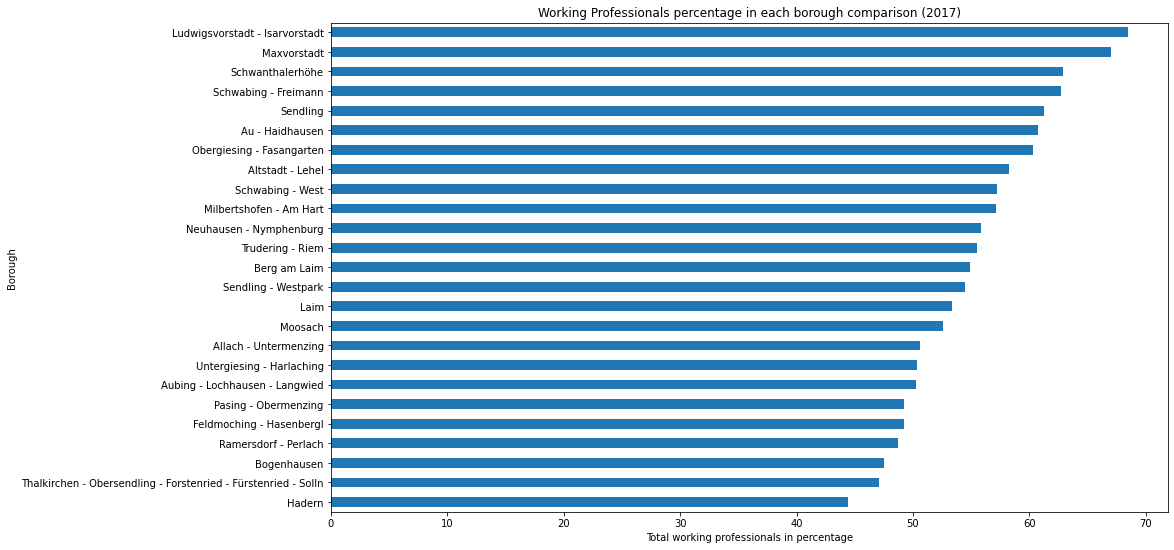

In [ ]:
final_df_new[['borough', 'total_work_professionals_percent']].plot(kind='barh', figsize=(15, 9), legend = None)

plt.xlabel('Total working professionals in percentage') # add to x-label to the plot
plt.ylabel('Borough') # add y-label to the plot
plt.title('Working Professionals percentage in each borough comparison (2017)') # add title to the plot
plt.yticks (np.arange(len(final_df_new)), final_df_new['borough'])
plt.show()

# From the above graph we can conclude areas like Hadern, Thalkirchen, Bogenhausen has less working professionals while Isarvorstadt, Maxvorstadt having large number of working professionals. This may be because Hadern, Thalkirchen is residential area and may have more old aged people. For advertising we can concentrate on other areas more as people who have more old-aged people tend to use public transport rather than private vehicle and might not need vehicle insurance

# To confirm the above statement let's sort by number of car registered in combination with working professional perecentage for each borough

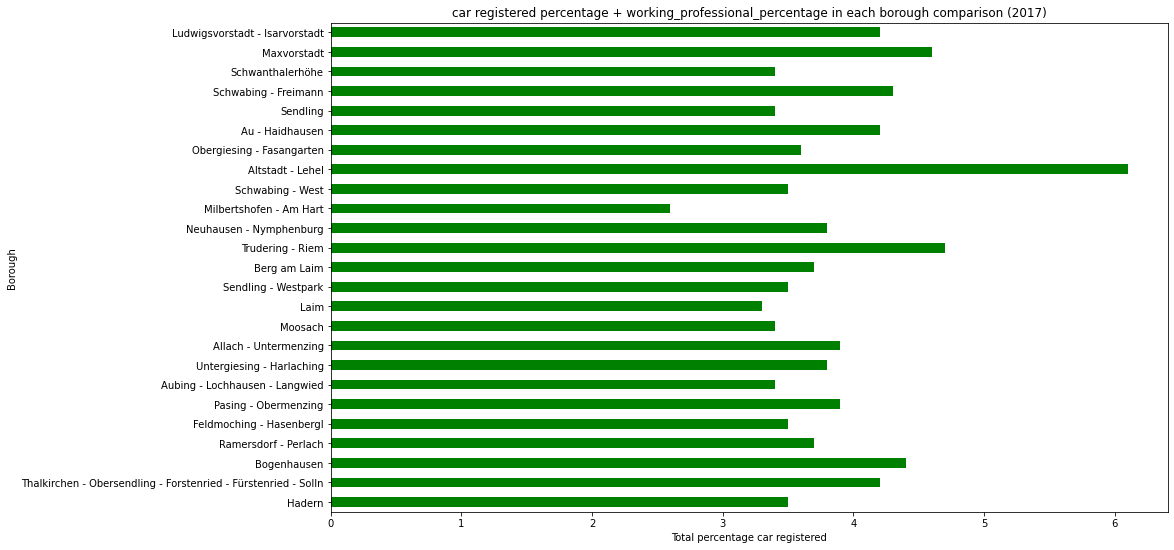

In [ ]:
final_df_new=final_df.sort_values(by=['total_work_professionals_percent','percentage_car_registered'],ignore_index=True).copy()
final_df_new[['borough', 'percentage_car_registered']].plot(kind='barh', figsize=(15, 9), legend = None,color='green')

plt.xlabel('Total percentage car registered') # add to x-label to the plot
plt.ylabel('Borough') # add y-label to the plot
plt.title('car registered percentage + working_professional_percentage in each borough comparison (2017)') # add title to the plot
plt.yticks (np.arange(len(final_df_new)), final_df_new['borough'])
plt.show()

# The graph confirms the above hypothesis we have made.
Next we can compare with the venue_category with borough and see if we can get some information

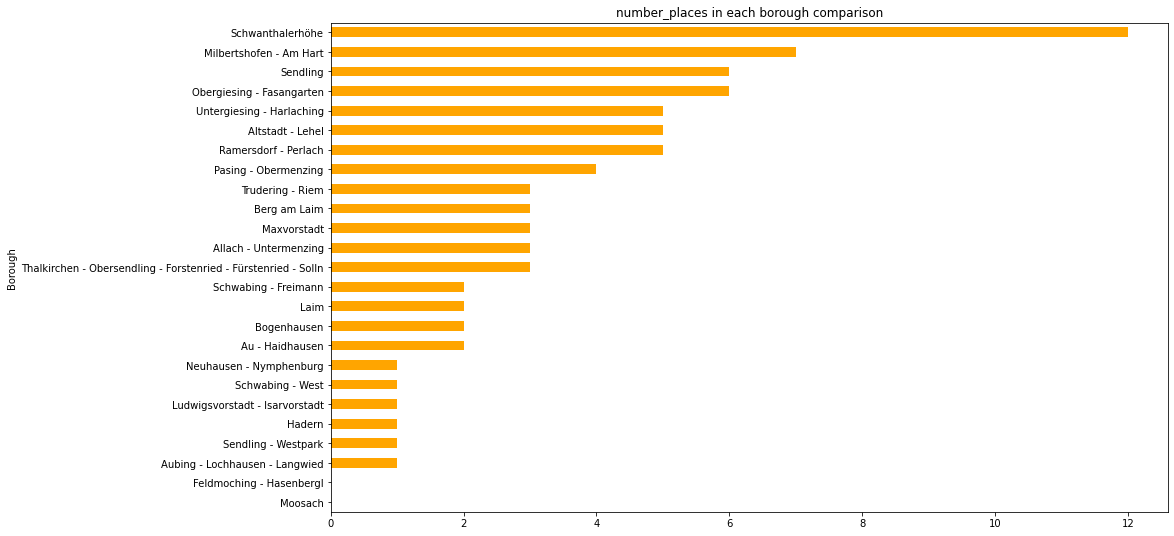

In [ ]:
final_df_new=final_df.sort_values(by=['number_places'],ignore_index=True).copy()
final_df_new[['borough', 'number_places']].plot(kind='barh', figsize=(15, 9), legend = None,color='orange')
#plt.xlabel('Borough') # add to x-label to the plot
plt.ylabel('Borough') # add y-label to the plot
plt.title('number_places in each borough comparison') # add title to the plot
plt.yticks (np.arange(len(final_df_new)), final_df_new['borough'])
plt.show()

# From the above graph, we can see that Mosach and Feldmoching does-not have any venue_category's that we have specified, may be because it is centre for other categories like shopping-mall, trade centre etc, so in this areas we have to use other venue-categories like restaurant, shopping mall if we have to promote the vehicle insurance company

# Cluster-Analysis
In order to identify groups (clusters) with similar characteristics, let's us apply the unsupervised learning method to our data, namely K-Means algorithm. 

In [ ]:
final_df.columns

Index(['borough', 'residents', 'surface', 'population density',
       'share_total_population', 'latitude', 'longitude',
       'old-not-working-percentage', 'no_old_not_working_professionals',
       'total_residents(above 18years)', 'total_work_professionals',
       'total_work_professionals_percent', 'car_category', 'year',
       'percentage_car_registered', 'no_cars_registered',
       'total_cars_registered', 'number_places'],
      dtype='object')

# We just use no_cars_registered, total_work_professionals,number_places to create clusters

In [ ]:
clusters_df=final_df[['no_cars_registered','total_work_professionals','number_places']].copy()

In [ ]:
clusters_df.head()

,no_cars_registered,total_work_professionals,number_places
0,565,15543,3.0
1,454,11887,5.0
2,710,36314,2.0
3,604,21244,1.0
4,544,23635,3.0


In [ ]:
clusters_df = StandardScaler().fit_transform(clusters_df)
clusters_df

array([[-0.65024798, -1.58516676, -0.06075969],
       [-0.95891   , -1.93845852,  0.69873642],
       [-0.24704084,  0.42200584, -0.44050774],
       [-0.54179916, -1.03425968, -0.82025579],
       [-0.7086435 , -0.80320919, -0.06075969],
       [ 2.05819169,  0.68349586, -0.44050774],
       [-0.06073134, -0.26370485, -1.20000385],
       [-0.42222739, -0.98661941, -0.82025579],
       [-0.57516803, -0.30216495, -0.44050774],
       [-0.67527463,  0.26120784, -0.82025579],
       [-0.40276222,  0.25753577, -0.06075969],
       [-0.67527463,  0.97813113,  1.45823252],
       [-0.43056961, -0.47021045, -1.20000385],
       [ 1.12386343,  2.08526013, -0.82025579],
       [-0.61131764, -0.08657581,  1.07848447],
       [ 0.91530801,  0.28005136,  0.31898836],
       [ 1.75787189,  2.0067938 ,  0.69873642],
       [ 0.70675259,  1.13670656, -0.44050774],
       [-0.22479493,  0.55497342, -0.82025579],
       [-1.50671556, -1.28569982,  3.35697278],
       [-1.05623586, -0.72319673,  1.078

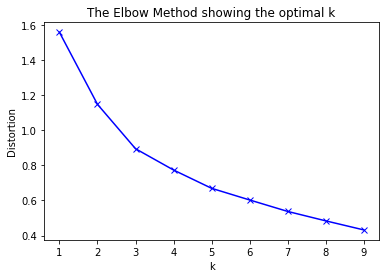

In [ ]:
loss_value = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(clusters_df)
    kmeanModel.fit(clusters_df)
    loss_value.append(sum(np.min(cdist(clusters_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / clusters_df.shape[0])

# Plot the elbow
plt.plot(K, loss_value, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# We can use three number of clusters

In [ ]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(clusters_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:len(final_df)]

array([1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 0, 2, 2, 2, 1, 0, 0, 1,
       2, 2, 0], dtype=int32)

Let's insert the Cluster labels into our final dataframe.

In [ ]:
final_df.insert(0, 'cluster_labels', kmeans.labels_)
final_df.head()

,cluster_labels,borough,residents,surface,population density,share_total_population,latitude,longitude,old-not-working-percentage,no_old_not_working_professionals,total_residents(above 18years),total_work_professionals,total_work_professionals_percent,car_category,year,percentage_car_registered,no_cars_registered,total_cars_registered,number_places
0,1,Allach - Untermenzing,30737,1545.17,20.0,2.10,48.195157,11.462973,28.4,6167,21710,15543,50.57,privat,2017,3.9,565,14672.4,3.0
1,0,Altstadt - Lehel,20422,314.57,65.0,1.39,48.137828,11.574582,22.5,3450,15337,11887,58.21,privat,2017,6.1,454,7382.8,5.0
2,1,Au - Haidhausen,59752,421.96,142.0,4.08,48.128753,11.590536,19.0,8514,44828,36314,60.77,privat,2017,4.2,710,16793.1,2.0
3,1,Aubing - Lochhausen - Langwied,42305,3406.02,12.0,2.89,48.165059,11.400221,29.9,9068,30312,21244,50.22,privat,2017,3.4,604,17819.1,1.0
4,1,Berg am Laim,43068,631.46,68.0,2.94,48.123483,11.633451,25.0,7865,31500,23635,54.88,privat,2017,3.7,544,14881.8,3.0


Now, let's create maps representing our clusters. 

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude_munich, longitude_munich], zoom_start=11)
colours = ['red', 'black', 'blue']
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, income in zip(final_df['latitude'], final_df['longitude'], final_df['borough'], final_df['cluster_labels'], clusters_df[:,1]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=income*5+15,
        popup=label,
        #color=rainbow[cluster-1],
        color=colours[cluster],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color=colours[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Clusters based on Number of venues

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude_munich, longitude_munich], zoom_start=11)
colours = ['red', 'black', 'blue']
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, income in zip(final_df['latitude'], final_df['longitude'], final_df['borough'], final_df['cluster_labels'], clusters_df[:,2]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=income*5+15,
        popup=label,
        #color=rainbow[cluster-1],
        color=colours[cluster],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color=colours[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Based on Number of vehicles registered

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude_munich, longitude_munich], zoom_start=11)
colours = ['red', 'black', 'blue']
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, income in zip(final_df['latitude'], final_df['longitude'], final_df['borough'], final_df['cluster_labels'], clusters_df[:,0]):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=income*5+15,
        popup=label,
        #color=rainbow[cluster-1],
        color=colours[cluster],
        fill=True,
        #fill_color=rainbow[cluster-1],
        fill_color=colours[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Scatter-plot between  vehicles regestered and venues the vehicle insurance tie up in each region of Munich

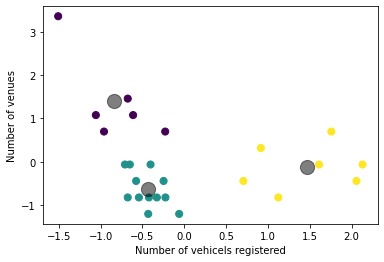

In [ ]:
y_kmeans = kmeans.predict(clusters_df)
plt.scatter(clusters_df[:, 0], clusters_df[:, 2], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5);
plt.xlabel('Number of vehicels registered')
plt.ylabel('Number of venues')
plt.show()

# Cluster 0

In [ ]:
final_df[(final_df['cluster_labels'] == 0)]

,cluster_labels,borough,residents,surface,population density,share_total_population,latitude,longitude,old-not-working-percentage,no_old_not_working_professionals,total_residents(above 18years),total_work_professionals,total_work_professionals_percent,car_category,year,percentage_car_registered,no_cars_registered,total_cars_registered,number_places
1,0,Altstadt - Lehel,20422,314.57,65.0,1.39,48.137828,11.574582,22.5,3450,15337,11887,58.21,privat,2017,6.1,454,7382.8,5.0
11,0,Milbertshofen - Am Hart,73617,1341.64,55.0,5.03,48.182385,11.575043,21.6,11597,53666,42069,57.15,privat,2017,2.6,556,21180.4,7.0
14,0,Obergiesing - Fasangarten,51499,572.04,90.0,3.52,48.111156,11.588909,20.8,8131,39182,31051,60.29,privat,2017,3.6,579,15992.3,6.0
19,0,Schwanthalerhöhe,29663,207.02,143.0,2.02,48.133782,11.541057,16.4,3649,22291,18642,62.85,privat,2017,3.4,257,7595.4,12.0
20,0,Sendling,39953,393.87,101.0,2.73,48.118012,11.539083,19.2,5829,30292,24463,61.23,privat,2017,3.4,419,12347.2,6.0
24,0,Untergiesing - Harlaching,51937,805.67,64.0,3.55,48.114963,11.570189,27.9,10112,36244,26132,50.31,privat,2017,3.8,717,18650.4,5.0


# Cluster 1

In [ ]:
final_df[(final_df['cluster_labels'] == 1)]

,cluster_labels,borough,residents,surface,population density,share_total_population,latitude,longitude,old-not-working-percentage,no_old_not_working_professionals,total_residents(above 18years),total_work_professionals,total_work_professionals_percent,car_category,year,percentage_car_registered,no_cars_registered,total_cars_registered,number_places
0,1,Allach - Untermenzing,30737,1545.17,20.0,2.10,48.195157,11.462973,28.4,6167,21710,15543,50.57,privat,2017,3.9,565,14672.4,3.0
2,1,Au - Haidhausen,59752,421.96,142.0,4.08,48.128753,11.590536,19.0,8514,44828,36314,60.77,privat,2017,4.2,710,16793.1,2.0
3,1,Aubing - Lochhausen - Langwied,42305,3406.02,12.0,2.89,48.165059,11.400221,29.9,9068,30312,21244,50.22,privat,2017,3.4,604,17819.1,1.0
4,1,Berg am Laim,43068,631.46,68.0,2.94,48.123483,11.633451,25.0,7865,31500,23635,54.88,privat,2017,3.7,544,14881.8,3.0
6,1,Feldmoching - Hasenbergl,59391,2893.78,21.0,4.05,48.218462,11.520409,27.8,11263,40481,29218,49.20,privat,2017,3.5,777,22302.2,0.0
7,1,Hadern,48945,922.37,53.0,3.34,48.118064,11.481842,33.3,10865,32602,21737,44.41,privat,2017,3.5,647,18413.3,1.0
8,1,Laim,54030,528.59,102.0,3.69,40.739978,-84.105006,27.0,10645,39465,28820,53.34,privat,2017,3.3,592,18123.4,2.0
9,1,Ludwigsvorstadt - Isarvorstadt,50620,440.14,115.0,3.46,48.130340,11.573366,14.3,5790,40440,34650,68.45,privat,2017,4.2,556,13288.2,1.0
10,1,Maxvorstadt,51642,429.79,120.0,3.53,48.151092,11.562418,15.1,6137,40749,34612,67.02,privat,2017,4.6,654,14123.6,3.0
12,1,Moosach,51537,1109.36,46.0,3.52,48.031726,11.875678,26.5,9757,36838,27081,52.55,privat,2017,3.4,644,18828.8,0.0


# Cluster 2

In [ ]:
final_df[(final_df['cluster_labels'] == 2)]

,cluster_labels,borough,residents,surface,population density,share_total_population,latitude,longitude,old-not-working-percentage,no_old_not_working_professionals,total_residents(above 18years),total_work_professionals,total_work_professionals_percent,car_category,year,percentage_car_registered,no_cars_registered,total_cars_registered,number_places
5,2,Bogenhausen,82138,2370.97,35.0,5.61,48.154782,11.633484,31.3,17773,56793,39020,47.51,privat,2017,4.4,1539,35320.7,2.0
13,2,Neuhausen - Nymphenburg,95906,1291.45,74.0,6.55,48.154222,11.531517,23.5,16412,69938,53526,55.81,privat,2017,3.8,1203,31707.3,1.0
15,2,Pasing - Obermenzing,70783,1649.78,43.0,4.83,48.152363,11.468434,29.1,14315,49160,34845,49.23,privat,2017,3.9,1128,29016.7,4.0
16,2,Ramersdorf - Perlach,108244,1989.50,54.0,7.39,48.100894,11.633371,30.2,22811,75525,52714,48.70,privat,2017,3.7,1431,38825.3,5.0
17,2,Schwabing - Freimann,69676,2567.22,27.0,4.76,48.189278,11.608583,20.8,11471,55181,43710,62.73,privat,2017,4.3,1053,24619.8,2.0
22,2,Thalkirchen - Obersendling - Forstenried - Für...,90790,1776.31,51.0,6.20,48.084213,11.508051,32.1,20199,62927,42728,47.06,privat,2017,4.2,1565,37156.9,3.0
23,2,Trudering - Riem,67009,2245.05,30.0,4.57,48.123175,11.664078,23.0,11079,48249,37170,55.47,privat,2017,4.7,1378,29526.4,3.0


# Results and discussion

From the clusters we can observe
cluster 0 - Have high number_venues where advertisement can be triggered 

Cluster 2 - Have medium number venues where advertisement can be triggered

Cluster 1 - Have low number of venues where advertisement can be triggered

So we have to give different set of offers/promotions for different clusters as the vehicles registered is high for cluster 0, medium for cluster 2 and low for cluster 1.
Based on the above clusters, Vehicle insurance company can try for different offers and they can use this initial clusters for promoting their company and see if the number of people opting for vehicle insurance or not.

However, one can perform further analysis of this particular cluster with additional features like net_income, how_freuqent people are visiting a venue category in borough, number of accidents happening in borough. With that we will get more accurate clusters for advertising vehicle insurance. 

# Conclusion 
To conclude, the basic data analysis was performed to identify different clusters for different kind of offers and advertisements for vehicle insurance in the city of Munich. During the analysis, several important statistical features of the boroughs were explored and visualized. Furthermore, clustering helped us to highlight the group of optimal areas. 
Finally we have three clusters based on number_venues present in the borough, number_vehicles registered and number_working_people in each borough. I hope the clusters have approximately similar characteristics which can be used by vehicle insurance company for their promotion activities